### Naïve Bayes

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [6]:
from sklearn.naive_bayes import GaussianNB

### Base de risco de crédito

In [ ]:
# Importar a base de dados
base_risco_credito = pd.read_csv('/content/drive/MyDrive/Machine Learning/Download - Curso/Bases de dados/risco_credito.csv')

In [ ]:
# Mostrar a base de dados importada
base_risco_credito

In [ ]:
# Atribuir a variável X os valores previsores
X_risco_credito = base_risco_credito.iloc[: , 0:4].values
X_risco_credito

In [ ]:
# Atribuir em 'y' os valores somente da classe
y_risco_credito = base_risco_credito.iloc[:,4].values
y_risco_credito

In [ ]:
# Preciso transformar esses itens que são Atributos Categóricos
# Usando o LabelEncoder e o OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Criar para cada categoria o LabelEncoder - instanciando
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantias = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [ ]:
# Atribuir a essas variáveis qual coluna da base de dados é de cada item - processamentos
X_risco_credito[:,0] = label_encoder_historia.fit_transform(X_risco_credito[:,0])
X_risco_credito[:,1] = label_encoder_divida.fit_transform(X_risco_credito[:,1])
X_risco_credito[:,2] = label_encoder_garantias.fit_transform(X_risco_credito[:,2])
X_risco_credito[:,3] = label_encoder_renda.fit_transform(X_risco_credito[:,3])

In [ ]:
# Agora vemos que todos os atributos categóricos tem valores calculáveis
X_risco_credito

In [ ]:
# Salvar agora essas duas novas variáveis
import pickle

In [ ]:
# Salvar a variável X_risco_credito
with open('risco_credito.pkl', mode='wb') as f:
  pickle.dump ([X_risco_credito, y_risco_credito], f)

In [ ]:
# Criando o Objeto Naïve Bayes - GaussianNB
naive_risco_credito = GaussianNB()
# Criando a tabela de probabilidade - Primeiro parametro os previsores e 2  parametro - classe
naive_risco_credito.fit(X_risco_credito, y_risco_credito)

GaussianNB()

In [ ]:
# Gerar uma previsão
# historia boa (0), divida alta(0), garantias nenhuma(1), renda > 35 (2)
# historia ruim (2), divida alta(0), garantias adequada(0), renda < 15 (0)

previsao = naive_risco_credito.predict([[0, 0, 1, 2], [2, 0, 0, 0]])

In [ ]:
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [ ]:
naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [ ]:
naive_risco_credito.class_count_

array([6., 5., 3.])

In [ ]:
naive_risco_credito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

### Base credit data

In [1]:
import pickle
with open('/content/drive/MyDrive/Machine Learning/Classificação/credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [2]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [3]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [7]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(X_credit_treinamento, y_credit_treinamento)

GaussianNB()

In [11]:
previsao_credit = naive_credit_data.predict(X_credit_teste)

In [14]:
previsao_credit

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:
accuracy_score(y_credit_teste,previsao_credit)

0.938

In [18]:
confusion_matrix(y_credit_teste, previsao_credit)

array([[428,   8],
       [ 23,  41]])

In [28]:
from yellowbrick.classifier import ConfusionMatrix

0.938

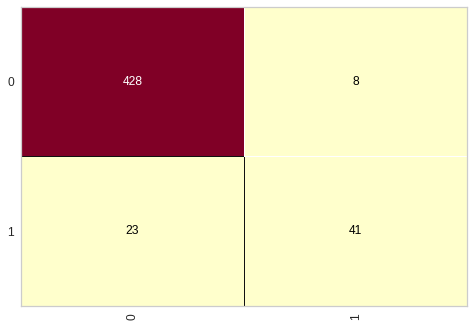

In [30]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [32]:
print(classification_report(y_credit_teste, previsao_credit))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



### Base Census

In [33]:
with open('/content/drive/MyDrive/Machine Learning/Classificação/census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [34]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [35]:
X_census_teste.shape , y_census_teste.shape

((4885, 108), (4885,))

In [36]:
C

In [37]:
naive_census_data.fit(X_census_treinamento, y_census_treinamento)

GaussianNB()

In [38]:
previsao_census = naive_census_data.predict(X_census_teste)

In [39]:
previsao_census

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [40]:
accuracy_score(y_census_teste,previsao_census)

0.4767656090071648

In [41]:
print(classification_report(y_census_teste, previsao_census))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



0.4767656090071648

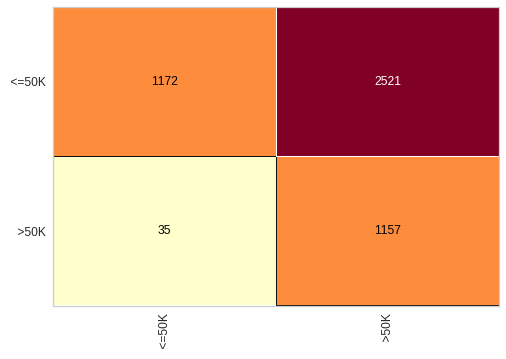

In [42]:
cm = ConfusionMatrix(naive_census_data)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)